# Plotting etc from dataframes

Now we have a dataframe saved in a .txt file, so no need for any particular kinds of software to do stuff with it.

![alt text](./img2.gif)

First let's load up our dependencies, we won't need many.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

Let's open the dataframe txt file:

In [2]:
df = pd.read_csv('./DataFrame.txt', delimiter=r'\s+', header='infer')

Now we can just check it all read in ok:

In [3]:
df.head()

,HT,MHT,NBJets,NJets,Passes_Cuts
0,1339.817749,486.756073,2,9,True
1,2539.739258,866.369924,3,8,True
2,2071.848633,636.202797,4,10,True
3,2112.030029,372.357679,3,8,True
4,1994.492554,1208.957270,5,7,True


Now we can apply some cuts on the variables and see what effect this has on other variables etc:

In [4]:
df_chopped = df.query('HT > 800 & MHT > 200 & NJets > 2 & NBJets > 0')

In [5]:
df_chopped.head()

,HT,MHT,NBJets,NJets,Passes_Cuts
0,1339.817749,486.756073,2,9,True
1,2539.739258,866.369924,3,8,True
2,2071.848633,636.202797,4,10,True
3,2112.030029,372.357679,3,8,True
4,1994.492554,1208.957270,5,7,True


Actually, we can take a shortcut there: the cuts we asked for are the same as asking for Passes_Cuts = True...

In [6]:
df_chopped = df.query('Passes_Cuts == True')
df_chopped.head()

,HT,MHT,NBJets,NJets,Passes_Cuts
0,1339.817749,486.756073,2,9,True
1,2539.739258,866.369924,3,8,True
2,2071.848633,636.202797,4,10,True
3,2112.030029,372.357679,3,8,True
4,1994.492554,1208.957270,5,7,True


### Plotting in MatPlotLib:

Now lets overlay the plots of the same variable (normalised) with and without cuts applied:

(we can change which we want by redefining 'var')

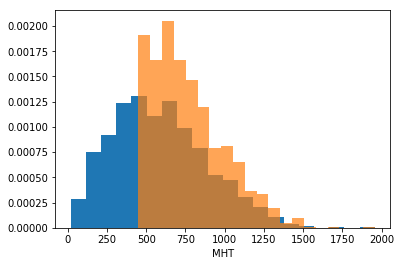

In [7]:
# vars are: MHT, HT, NJets, NBJets
var = 'MHT'

# We can redefine our query too
query = 'HT > 1000. & MHT > 450. & NJets > 3 & NBJets >= 0'
df_chopped = df.query(query)

plt.figure()
plt.hist(df[var], 20, density=True, label='No Cuts')
plt.hist(df_chopped[var], 20, density=True, label=query, alpha=0.7)
plt.xlabel(var)
plt.show()

## Bonus extra fun game: 2D plots with marginal histograms!

Here's a little wrinkle I did with Seaborn, but it requires some fiddling.

The fiddly bits I'll put into a function so we needn't worry about them again.

In [10]:
sns.set_style("white")

def Plot2DSeaborn(df, X, Y, nBins):

    plt.figure()

    # Set up the 2D grid
    g = sns.JointGrid(x=df[X], y=df[Y], space=0.)
    g.plot_joint(plt.hexbin, cmap='BuPu', gridsize=nBins)
    #g.plot_joint(plt.hexbin, norm=LogNorm(), cmap='BuPu', gridsize=20)

    cm = plt.cm.get_cmap('BuPu')

    # x-axis marginal histogram
    nx, binsx, patchesx = g.ax_marg_x.hist(df[X], log=False, bins=nBins)
    colx = (nx-nx.min())/(nx.max()-nx.min())
    # Set the colours to match the 2D grid
    for c, p in zip(colx, patchesx):
        plt.setp(p, 'facecolor', cm(c))

    # y-axis marginal histogram
    ny, binsy, patchesy = g.ax_marg_y.hist(df[Y], bins=nBins, log=False, orientation='horizontal')
    coly = (ny-ny.min())/(ny.max()-ny.min())
    # Set the colours to match the 2D grid
    for c, p in zip(coly, patchesy):
        plt.setp(p, 'facecolor', cm(c))

    g.set_axis_labels(X, Y, fontsize=14)

    # Rearrange the canvas a little to accommodate the marginals
    plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
    cax = g.fig.add_axes([.91, .3, .02, .3])  # x, y, width, height
    plt.colorbar(cax=cax)
    
    plt.show()

Ok, now we can call this function to plot two distributions:

<Figure size 432x288 with 0 Axes>

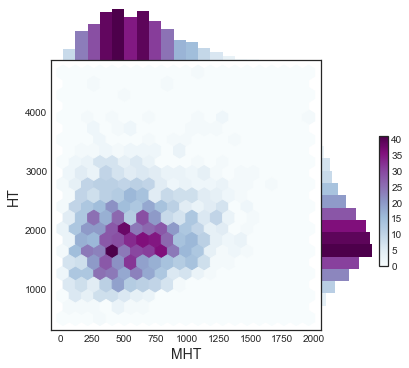

In [11]:
# Remember, vars are MHT, HT, NJets, NBJets

var_x = 'MHT'
var_y = 'HT'

query = 'HT > 0. & MHT > 0. & NJets > -1 & NBJets > -1'
Plot2DSeaborn(df, var_x, var_y, 20)